# 1) Data Cleaning and tranformation before training

In [3]:
import pandas as pd

# Load your data
df = pd.read_excel('booking-FulldataCleaned.xlsx',sheet_name="data",header=2)
df.head()

,place_image,Nom_hebergement,url_image,city,address,Distance_of_center,review_score,Review,NB_experience,description,...,Bed_Type,availabilityInfo,Number_of_Nights,nb_adults,nb_childrens,nb_rooms,original_Price,discounted_Price,checkin_date,checkout_date
0,NaN,Manolita Paris,https://cf.bstatic.com/xdata/images/hotel/squa...,Paris,"18e arr., Paris","3,3 km du centre","9,2",Fabuleux,337.0,"Chambre Double Premium avec Balcon, 1 grand li...",...,1 grand lit double,Plus que 1 hébergement à ce prix sur notre site,1,2,0,1,NaN,533,2024-10-01,2024-10-02
1,NaN,Hôtel Juliette,https://cf.bstatic.com/xdata/images/hotel/squa...,Paris,"18e arr., Paris","3,6 km du centre","7,8",Bien,810.0,"Chambre Double avec Salle de Bains Commune, 1 ...",...,1 lit double,NaN,1,2,0,1,0.0,130,2024-10-01,2024-10-02
2,NaN,GREEN PARK HOTEL PARIS,https://cf.bstatic.com/xdata/images/hotel/squa...,Paris,"19e arr., Paris","3,4 km du centre","8,9",Superbe,111.0,"Chambre Double Supérieure, Types de lits : 1 l...",...,Types de lits : 1 lit double ou 2 lits simples,Plus que 1 hébergement à ce prix sur notre site,1,2,0,1,NaN,226,2024-10-01,2024-10-02
3,NaN,Hotel Eiffel Seine,https://cf.bstatic.com/xdata/images/hotel/squa...,Paris,"15e arr., Paris","4,6 km du centre","8,2",Très bien,4649.0,"Chambre Double Classique, Types de lits : 1 li...",...,Types de lits : 1 lit double ou 2 lits simples,NaN,1,2,0,1,NaN,262,2024-10-01,2024-10-02
4,NaN,ibis Styles Paris Bercy,https://cf.bstatic.com/xdata/images/hotel/squa...,Paris,"12e arr., Paris",3 km du centre,"7,5",Bien,9665.0,"Chambre Double Standard, 1 lit double, undefined",...,1 lit double,0,1,2,0,1,NaN,273,2024-10-01,2024-10-02


In [4]:
df.shape

(579, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   place_image         0 non-null      float64
 1   Nom_hebergement     579 non-null    object 
 2   url_image           579 non-null    object 
 3   city                579 non-null    object 
 4   address             579 non-null    object 
 5   Distance_of_center  579 non-null    object 
 6   review_score        416 non-null    object 
 7   Review              579 non-null    object 
 8   NB_experience       436 non-null    float64
 9   description         579 non-null    object 
 10  Room_Type           579 non-null    object 
 11  Bed_Type            579 non-null    object 
 12  availabilityInfo    443 non-null    object 
 13  Number_of_Nights    579 non-null    int64  
 14  nb_adults           579 non-null    int64  
 15  nb_childrens        579 non-null    int64  
 16  nb_rooms

In [6]:
df=df.drop(["place_image","Nom_hebergement","address","url_image","Number_of_Nights","description","nb_adults","nb_childrens","nb_rooms","original_Price","checkin_date","checkout_date"],axis=1)
df.head()

,city,Distance_of_center,review_score,Review,NB_experience,Room_Type,Bed_Type,availabilityInfo,discounted_Price
0,Paris,"3,3 km du centre","9,2",Fabuleux,337.0,Chambre Double Premium avec Balcon,1 grand lit double,Plus que 1 hébergement à ce prix sur notre site,533
1,Paris,"3,6 km du centre","7,8",Bien,810.0,Chambre Double avec Salle de Bains Commune,1 lit double,NaN,130
2,Paris,"3,4 km du centre","8,9",Superbe,111.0,Chambre Double Supérieure,Types de lits : 1 lit double ou 2 lits simples,Plus que 1 hébergement à ce prix sur notre site,226
3,Paris,"4,6 km du centre","8,2",Très bien,4649.0,Chambre Double Classique,Types de lits : 1 lit double ou 2 lits simples,NaN,262
4,Paris,3 km du centre,"7,5",Bien,9665.0,Chambre Double Standard,1 lit double,0,273


In [7]:
df.shape

(579, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                579 non-null    object 
 1   Distance_of_center  579 non-null    object 
 2   review_score        416 non-null    object 
 3   Review              579 non-null    object 
 4   NB_experience       436 non-null    float64
 5   Room_Type           579 non-null    object 
 6   Bed_Type            579 non-null    object 
 7   availabilityInfo    443 non-null    object 
 8   discounted_Price    579 non-null    object 
dtypes: float64(1), object(8)
memory usage: 40.8+ KB


In [9]:
# fixing data types

df["review_score"]=df["review_score"].str.replace(",",".")
df['discounted_Price']=df['discounted_Price'].str.replace(" ","")
df=df.astype({
    "review_score":"float64",
    "discounted_Price":"float64"
    
})

In [10]:
df.dtypes


city                   object
Distance_of_center     object
review_score          float64
Review                 object
NB_experience         float64
Room_Type              object
Bed_Type               object
availabilityInfo       object
discounted_Price      float64
dtype: object

In [11]:
# retriving the distance from the center and changeing the type to float instead of object
df["Distance_of_center"] = df["Distance_of_center"].str.split(" ").str[0].str.replace("\xa0", "").str.replace(",", ".").str.replace("km","").str.replace("m","").astype("float64")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                579 non-null    object 
 1   Distance_of_center  579 non-null    float64
 2   review_score        416 non-null    float64
 3   Review              579 non-null    object 
 4   NB_experience       436 non-null    float64
 5   Room_Type           579 non-null    object 
 6   Bed_Type            579 non-null    object 
 7   availabilityInfo    443 non-null    object 
 8   discounted_Price    579 non-null    float64
dtypes: float64(4), object(5)
memory usage: 40.8+ KB


In [13]:
# checking the columns with the N/A vallues
df.isna().sum()

city                    0
Distance_of_center      0
review_score          163
Review                  0
NB_experience         143
Room_Type               0
Bed_Type                0
availabilityInfo      136
discounted_Price        0
dtype: int64

In [14]:
# fixing the N/A from the columns (review_score, NB_experience, availabilityInfo)

print("moyenne de review_score",df['review_score'].mean())
print("le plus fréquent de review_score",df['review_score'].mode()[0])
# I decided to replace N/A with the most fréquence value beause there is no difference between mode() or mean()

moyenne de review_score 7.739663461538464
le plus fréquent de review_score 8.0


In [15]:
print("moyenne de NB_experience",df['NB_experience'].mean())
print("le plus fréquent de NB_experience",df['NB_experience'].mode()[0])
# I decided to replace N/A with the mode value 

moyenne de NB_experience 1212.133027522936
le plus fréquent de NB_experience 1.0


In [16]:
print("le plus fréquent de availabilityInfo",df['availabilityInfo'].mode()[0])
df
# I decided to replace the N/A values and value 0 with the string "No_Availability" which describe the two cases

le plus fréquent de availabilityInfo 0


,city,Distance_of_center,review_score,Review,NB_experience,Room_Type,Bed_Type,availabilityInfo,discounted_Price
0,Paris,3.3,9.2,Fabuleux,337.0,Chambre Double Premium avec Balcon,1 grand lit double,Plus que 1 hébergement à ce prix sur notre site,533.0
1,Paris,3.6,7.8,Bien,810.0,Chambre Double avec Salle de Bains Commune,1 lit double,NaN,130.0
2,Paris,3.4,8.9,Superbe,111.0,Chambre Double Supérieure,Types de lits : 1 lit double ou 2 lits simples,Plus que 1 hébergement à ce prix sur notre site,226.0
3,Paris,4.6,8.2,Très bien,4649.0,Chambre Double Classique,Types de lits : 1 lit double ou 2 lits simples,NaN,262.0
4,Paris,3.0,7.5,Bien,9665.0,Chambre Double Standard,1 lit double,0,273.0
...,...,...,...,...,...,...,...,...,...
574,Bagnolet,0.6,NaN,No-review,NaN,Appartement 1 Chambre,1 très grand lit double,Plus que 2 à ce prix sur notre site,289.0
575,Bagnolet,0.6,NaN,No-review,NaN,Appartement 1 Chambre,1 lit double,0,421.0
576,Bagnolet,0.5,NaN,No-review,NaN,Appartement 1 Chambre,"2 lits (1 lit double, 1 canapé-lit)",Plus que 1 à ce prix sur notre site,278.0
577,Bagnolet,0.6,NaN,No-review,NaN,Villa,Villa entière • 6 chambres • 1 salle de bains ...,Plus que 1 à ce prix sur notre site,2128.0


In [17]:
df['review_score']=df['review_score'].fillna(df['review_score'].mean())
df['NB_experience']=df['NB_experience'].fillna(df['NB_experience'].mode()[0])
df['availabilityInfo']=df['availabilityInfo'].replace({None: "No_Availability",0:"No_Availability"})


In [18]:
df.isna().sum()

city                  0
Distance_of_center    0
review_score          0
Review                0
NB_experience         0
Room_Type             0
Bed_Type              0
availabilityInfo      0
discounted_Price      0
dtype: int64

In [19]:
df.info()
# types is fixed, N/A is checked and fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                579 non-null    object 
 1   Distance_of_center  579 non-null    float64
 2   review_score        579 non-null    float64
 3   Review              579 non-null    object 
 4   NB_experience       579 non-null    float64
 5   Room_Type           579 non-null    object 
 6   Bed_Type            579 non-null    object 
 7   availabilityInfo    579 non-null    object 
 8   discounted_Price    579 non-null    float64
dtypes: float64(4), object(5)
memory usage: 40.8+ KB


In [20]:
# check if there is a duplicated values in our data
df[df.duplicated(keep=False)]

,city,Distance_of_center,review_score,Review,NB_experience,Room_Type,Bed_Type,availabilityInfo,discounted_Price
562,Bagnolet,0.6,7.739663,No-review,1.0,Appartement 1 Chambre,1 lit double,No_Availability,145.0
567,Bagnolet,0.6,7.739663,No-review,1.0,Appartement 1 Chambre,1 lit double,No_Availability,145.0
572,Bagnolet,0.6,7.739663,No-review,1.0,Appartement 1 Chambre,1 lit double,No_Availability,145.0


In [21]:
df=df.drop_duplicates(keep="first")

In [22]:
df[df.duplicated(keep=False)]
# I verify successfully that the duplicated values are correctly deleted, now i gonne procede in the process of cleaning

,city,Distance_of_center,review_score,Review,NB_experience,Room_Type,Bed_Type,availabilityInfo,discounted_Price


In [23]:
# now I'm gona replace the names of the columns
df.columns

Index(['city', 'Distance_of_center', 'review_score', 'Review', 'NB_experience',
       'Room_Type', 'Bed_Type', 'availabilityInfo', 'discounted_Price'],
      dtype='object')

In [24]:
df.columns = [
    'City', 
    'Distance_from_Center_(km)', 
    'Review_Score', 
    'Review_Text', 
    'Number_of_Experiences', 
    'Room_Type', 
    'Bed_Type', 
    'Availability_Info', 
    'Discounted_Price_(€)'
]

In [25]:
df.columns
# renaming of columns is checked

Index(['City', 'Distance_from_Center_(km)', 'Review_Score', 'Review_Text',
       'Number_of_Experiences', 'Room_Type', 'Bed_Type', 'Availability_Info',
       'Discounted_Price_(€)'],
      dtype='object')

In [26]:
df

,City,Distance_from_Center_(km),Review_Score,Review_Text,Number_of_Experiences,Room_Type,Bed_Type,Availability_Info,Discounted_Price_(€)
0,Paris,3.3,9.200000,Fabuleux,337.0,Chambre Double Premium avec Balcon,1 grand lit double,Plus que 1 hébergement à ce prix sur notre site,533.0
1,Paris,3.6,7.800000,Bien,810.0,Chambre Double avec Salle de Bains Commune,1 lit double,No_Availability,130.0
2,Paris,3.4,8.900000,Superbe,111.0,Chambre Double Supérieure,Types de lits : 1 lit double ou 2 lits simples,Plus que 1 hébergement à ce prix sur notre site,226.0
3,Paris,4.6,8.200000,Très bien,4649.0,Chambre Double Classique,Types de lits : 1 lit double ou 2 lits simples,No_Availability,262.0
4,Paris,3.0,7.500000,Bien,9665.0,Chambre Double Standard,1 lit double,No_Availability,273.0
...,...,...,...,...,...,...,...,...,...
574,Bagnolet,0.6,7.739663,No-review,1.0,Appartement 1 Chambre,1 très grand lit double,Plus que 2 à ce prix sur notre site,289.0
575,Bagnolet,0.6,7.739663,No-review,1.0,Appartement 1 Chambre,1 lit double,No_Availability,421.0
576,Bagnolet,0.5,7.739663,No-review,1.0,Appartement 1 Chambre,"2 lits (1 lit double, 1 canapé-lit)",Plus que 1 à ce prix sur notre site,278.0
577,Bagnolet,0.6,7.739663,No-review,1.0,Villa,Villa entière • 6 chambres • 1 salle de bains ...,Plus que 1 à ce prix sur notre site,2128.0


In [27]:
df.dtypes

City                          object
Distance_from_Center_(km)    float64
Review_Score                 float64
Review_Text                   object
Number_of_Experiences        float64
Room_Type                     object
Bed_Type                      object
Availability_Info             object
Discounted_Price_(€)         float64
dtype: object

In [28]:
# I want to make a copy before procceding to encoding, this will be helpfull for data Analysis
Adf= df

In [29]:
# before going checking the data corellation, I need to encode the categorical data first , I choose to apply both 
#the label-encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder


# Define columns for one-hot encoding
one_hot_columns = ['Review_Text', 'Room_Type', 'Bed_Type']
# Define columns for label encoding (excluding columns already one-hot encoded)
label_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in one_hot_columns]

# Apply One-Hot Encoding to specific columns
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Apply Label Encoding to remaining categorical columns
label_encoders = {}
for column in label_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



In [30]:
df.shape

(577, 295)

In [31]:
df

,City,Distance_from_Center_(km),Review_Score,Number_of_Experiences,Availability_Info,Discounted_Price_(€),Review_Text_Exceptionnel,Review_Text_Fabuleux,Review_Text_No-review,Review_Text_Superbe,...,Bed_Type_Studio entier • 1 salle de bains • 40m²,Bed_Type_Studio entier • 1 cuisine • 20m²,Bed_Type_Studio entier • 1 cuisine • 27m²,Bed_Type_Studio entier • 1 cuisine • 29m²,Bed_Type_Studio entier • 1 cuisine • 34m²,Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²,Bed_Type_Types de lits : 1 lit double ou 2 lits simples,Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²,Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²,Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²
0,6,3.3,9.200000,337.0,1,533.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3.6,7.800000,810.0,0,130.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,3.4,8.900000,111.0,1,226.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,6,4.6,8.200000,4649.0,0,262.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6,3.0,7.500000,9665.0,0,273.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0,0.6,7.739663,1.0,4,289.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
575,0,0.6,7.739663,1.0,0,421.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
576,0,0.5,7.739663,1.0,2,278.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
577,0,0.6,7.739663,1.0,2,2128.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# check for the corelation of the data
# Set Pandas options to display more columns and rows
import numpy as np
corr= df.corr()

# Number of rows to display at once
chunk_size = 50

# Display the table of corellation in chunks
for start in range(0, len(corr), chunk_size):
    end = min(start + chunk_size, len(corr))
    display(corr.iloc[start:end])


,City,Distance_from_Center_(km),Review_Score,Number_of_Experiences,Availability_Info,Discounted_Price_(€),Review_Text_Exceptionnel,Review_Text_Fabuleux,Review_Text_No-review,Review_Text_Superbe,...,Bed_Type_Studio entier • 1 salle de bains • 40m²,Bed_Type_Studio entier • 1 cuisine • 20m²,Bed_Type_Studio entier • 1 cuisine • 27m²,Bed_Type_Studio entier • 1 cuisine • 29m²,Bed_Type_Studio entier • 1 cuisine • 34m²,Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²,Bed_Type_Types de lits : 1 lit double ou 2 lits simples,Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²,Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²,Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²
City,1.000000,-0.018915,1.314491e-01,0.154755,-0.019527,0.046606,0.052030,0.048258,-0.170279,0.022359,...,0.031585,-0.063596,-0.037974,-0.065798,-6.579830e-02,0.031585,0.063636,-1.015064e-02,0.059409,-6.579830e-02
Distance_from_Center_(km),-0.018915,1.000000,-4.783940e-02,-0.013554,0.077902,-0.137693,0.019978,-0.023878,-0.056964,0.002796,...,0.093500,0.061592,-0.020684,-0.020684,-2.097095e-02,0.107827,-0.040216,-2.094230e-02,-0.020398,-2.094230e-02
Review_Score,0.131449,-0.047839,1.000000e+00,0.011758,0.034483,0.104278,0.171048,0.348022,-0.504067,0.228371,...,-0.015247,-0.031399,-0.001376,-0.008311,-3.822361e-17,-0.008311,0.094054,-3.412898e-17,0.061048,-6.138993e-17
Number_of_Experiences,0.154755,-0.013554,1.175847e-02,1.000000,0.116245,-0.086743,-0.091709,-0.093041,-0.185507,-0.010998,...,-0.009904,-0.020769,-0.001986,-0.015111,-1.512793e-02,0.070581,0.054176,-1.512793e-02,-0.015111,-1.512793e-02
Availability_Info,-0.019527,0.077902,3.448260e-02,0.116245,1.000000,0.016517,-0.064998,-0.025236,-0.165778,0.025895,...,0.082464,-0.003415,0.184315,0.014563,-1.938763e-02,-0.019388,-0.018439,1.456279e-02,-0.019388,1.456279e-02
Discounted_Price_(€),0.046606,-0.137693,1.042781e-01,-0.086743,0.016517,1.000000,-0.027479,0.070436,0.135221,-0.001914,...,-0.024178,-0.027274,-0.002841,-0.016455,-1.566942e-02,-0.025225,0.057215,4.984978e-01,0.013259,2.429850e-01
Review_Text_Exceptionnel,0.052030,0.019978,1.710479e-01,-0.091709,-0.064998,-0.027479,1.000000,-0.077413,-0.195114,-0.069355,...,-0.010588,-0.014987,-0.010588,-0.010588,-1.058822e-02,-0.010588,-0.044276,-1.058822e-02,0.163966,-1.058822e-02
Review_Text_Fabuleux,0.048258,-0.023878,3.480219e-01,-0.093041,-0.025236,0.070436,-0.077413,1.000000,-0.233902,-0.083143,...,-0.012693,-0.017966,-0.012693,-0.012693,-1.269316e-02,-0.012693,0.020454,-1.269316e-02,-0.012693,-1.269316e-02
Review_Text_No-review,-0.170279,-0.056964,-5.040666e-01,-0.185507,-0.165778,0.135221,-0.195114,-0.233902,1.000000,-0.209554,...,-0.031992,0.015764,-0.031992,-0.031992,5.426692e-02,-0.031992,-0.133778,5.426692e-02,-0.031992,5.426692e-02
Review_Text_Superbe,0.022359,0.002796,2.283714e-01,-0.010998,0.025895,-0.001914,-0.069355,-0.083143,-0.209554,1.000000,...,-0.011372,-0.016096,-0.011372,-0.011372,-1.137186e-02,-0.011372,0.073497,-1.137186e-02,-0.011372,-1.137186e-02


,City,Distance_from_Center_(km),Review_Score,Number_of_Experiences,Availability_Info,Discounted_Price_(€),Review_Text_Exceptionnel,Review_Text_Fabuleux,Review_Text_No-review,Review_Text_Superbe,...,Bed_Type_Studio entier • 1 salle de bains • 40m²,Bed_Type_Studio entier • 1 cuisine • 20m²,Bed_Type_Studio entier • 1 cuisine • 27m²,Bed_Type_Studio entier • 1 cuisine • 29m²,Bed_Type_Studio entier • 1 cuisine • 34m²,Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²,Bed_Type_Types de lits : 1 lit double ou 2 lits simples,Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²,Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²,Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²
Room_Type_Chambre Double ou Lits Jumeaux Classique,0.015170,-0.029217,2.750537e-02,0.017532,0.056654,0.006261,-0.014987,-0.017966,-0.045283,-0.016096,...,-0.002457,-0.003478,-0.002457,-0.002457,-0.002457,-0.002457,0.338494,-0.002457,-0.002457,-0.002457
Room_Type_Chambre Double ou Lits Jumeaux Standard,0.054553,0.021196,2.505101e-02,0.031910,-0.015428,-0.000131,-0.014987,-0.017966,-0.045283,-0.016096,...,-0.002457,-0.003478,-0.002457,-0.002457,-0.002457,-0.002457,0.338494,-0.002457,-0.002457,-0.002457
Room_Type_Chambre Double ou Lits Jumeaux Supérieure,0.017673,-0.020083,4.717616e-02,-0.009177,-0.019388,0.328330,-0.010588,0.136775,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Chambre Double Économique,0.017673,-0.020025,2.290032e-02,0.039934,-0.019388,-0.005590,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Chambre Double/Lits Jumeaux Supérieure,0.017673,-0.019997,2.983627e-02,0.045174,-0.019388,-0.003889,-0.010588,-0.012693,-0.031992,0.152667,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,0.239143,-0.001736,-0.001736,-0.001736
Room_Type_Chambre Exécutive,0.017673,-0.020255,1.943234e-02,0.031834,-0.019388,0.001740,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,0.239143,-0.001736,-0.001736,-0.001736
Room_Type_Chambre Familiale,-0.037974,-0.020856,-2.218338e-02,0.005287,-0.019388,-0.001271,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Chambre INNSIDE,0.031585,-0.020369,2.636829e-02,0.083177,0.099439,-0.008470,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Chambre Lit King-Size,0.089603,-0.007823,3.021394e-02,0.130586,0.002205,-0.025879,-0.023759,-0.028482,-0.033075,-0.025517,...,-0.003896,-0.005514,-0.003896,-0.003896,-0.003896,-0.003896,-0.016290,-0.003896,-0.003896,-0.003896
Room_Type_Chambre Lit King-Size Classique,0.044707,-0.028487,2.961753e-03,0.057753,-0.027442,-0.012730,-0.014987,-0.017966,-0.045283,-0.016096,...,-0.002457,-0.003478,-0.002457,-0.002457,-0.002457,-0.002457,-0.010276,-0.002457,-0.002457,-0.002457


,City,Distance_from_Center_(km),Review_Score,Number_of_Experiences,Availability_Info,Discounted_Price_(€),Review_Text_Exceptionnel,Review_Text_Fabuleux,Review_Text_No-review,Review_Text_Superbe,...,Bed_Type_Studio entier • 1 salle de bains • 40m²,Bed_Type_Studio entier • 1 cuisine • 20m²,Bed_Type_Studio entier • 1 cuisine • 27m²,Bed_Type_Studio entier • 1 cuisine • 29m²,Bed_Type_Studio entier • 1 cuisine • 34m²,Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²,Bed_Type_Types de lits : 1 lit double ou 2 lits simples,Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²,Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²,Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²
Room_Type_Mobile Home,-0.010151,-0.020828,-2.354086e-17,-0.015128,0.014563,0.446400,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_One-Bedroom Executive Apartment - 50m2 (4 adults),-0.037974,-0.020856,1.596436e-02,0.000724,-0.019388,0.010772,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Studio,-0.051723,0.022829,6.978040e-02,-0.040973,0.021249,-0.053433,0.013844,0.086301,-0.036471,0.008038,...,-0.006072,0.198044,-0.006072,0.285905,0.285905,-0.006072,-0.025392,-0.006072,-0.006072,-0.006072
Room_Type_Studio (2 Adultes),-0.076147,-0.041879,-7.973797e-03,0.022128,0.267476,-0.002154,-0.021232,-0.025453,-0.064151,0.059431,...,-0.003481,-0.004928,-0.003481,-0.003481,-0.003481,-0.003481,-0.014557,-0.003481,-0.003481,-0.003481
Room_Type_Studio Deluxe,0.059409,-0.020828,-1.296907e-01,-0.015128,-0.019388,0.019542,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Studio Double,0.021491,0.123453,-2.758232e-03,0.033655,0.029202,-0.025712,-0.021232,-0.025453,-0.064151,-0.022803,...,-0.003481,-0.004928,-0.003481,-0.003481,-0.003481,-0.003481,-0.014557,-0.003481,-0.003481,-0.003481
Room_Type_Studio Double Deluxe,-0.024063,0.036193,-2.218338e-02,-0.014450,-0.019388,-0.010041,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Studio Double Supérieur,-0.051886,-0.020856,3.330425e-02,-0.004962,0.150364,-0.005459,-0.010588,-0.012693,-0.031992,0.152667,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Studio Double Supérieur (2 Adultes) - 106 Rue de Paris,-0.051886,-0.020942,1.596436e-02,0.001898,-0.019388,0.001740,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Room_Type_Studio Lit King-Size,0.031585,-0.020341,2.636829e-02,0.006857,-0.019388,-0.007816,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736


,City,Distance_from_Center_(km),Review_Score,Number_of_Experiences,Availability_Info,Discounted_Price_(€),Review_Text_Exceptionnel,Review_Text_Fabuleux,Review_Text_No-review,Review_Text_Superbe,...,Bed_Type_Studio entier • 1 salle de bains • 40m²,Bed_Type_Studio entier • 1 cuisine • 20m²,Bed_Type_Studio entier • 1 cuisine • 27m²,Bed_Type_Studio entier • 1 cuisine • 29m²,Bed_Type_Studio entier • 1 cuisine • 34m²,Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²,Bed_Type_Types de lits : 1 lit double ou 2 lits simples,Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²,Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²,Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²
"Bed_Type_3 lits (2 lits doubles, 1 canapé-lit)",-0.036787,0.024943,8.632812e-03,-0.047964,-0.029331,0.025614,-0.033748,-0.040457,0.117977,0.068322,...,-0.005533,-0.007832,-0.005533,-0.005533,-0.005533,-0.005533,-0.023139,-0.005533,-0.005533,-0.005533
"Bed_Type_3 lits (2 lits simples, 1 canapé-lit)",-0.093134,-0.029480,-8.843320e-17,-0.021413,-0.027442,-0.022642,-0.014987,-0.017966,0.076812,-0.016096,...,-0.002457,-0.003478,-0.002457,-0.002457,-0.002457,-0.002457,-0.010276,-0.002457,-0.002457,-0.002457
"Bed_Type_3 lits (2 lits simples, 1 grand lit double)",-0.051886,-0.020742,3.036797e-17,-0.015128,0.014563,0.147822,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
"Bed_Type_3 lits (2 lits simples, 1 lit superposé)",0.031585,-0.020169,-7.420303e-02,0.122271,-0.019388,-0.028759,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_3 lits doubles,-0.001520,-0.036154,3.218278e-17,-0.026248,0.025267,0.046398,-0.018371,-0.022023,0.094157,-0.019731,...,-0.003012,-0.004264,-0.003012,-0.003012,-0.003012,-0.003012,-0.012596,-0.003012,-0.003012,-0.003012
"Bed_Type_4 lits (1 lit double, 3 canapés-lits)",0.045497,-0.020570,5.081666e-17,-0.015128,-0.019388,0.024385,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
"Bed_Type_4 lits (1 lit simple, 1 lit double, 1 canapé-lit, 1 grand lit double)",-0.051886,-0.020942,-4.615530e-17,-0.015128,-0.019388,0.019149,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
"Bed_Type_4 lits (1 lit simple, 1 lit double, 2 canapés-lits)",0.059409,0.093500,9.028411e-03,-0.014946,-0.019388,0.000693,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
"Bed_Type_4 lits (1 lit simple, 3 grands lits doubles)",0.003761,-0.020942,5.549973e-17,-0.015128,0.014563,0.040224,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
"Bed_Type_4 lits (2 lits doubles, 2 canapés-lits)",-0.010151,-0.020914,-3.749793e-17,-0.015128,-0.019388,0.025302,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736


,City,Distance_from_Center_(km),Review_Score,Number_of_Experiences,Availability_Info,Discounted_Price_(€),Review_Text_Exceptionnel,Review_Text_Fabuleux,Review_Text_No-review,Review_Text_Superbe,...,Bed_Type_Studio entier • 1 salle de bains • 40m²,Bed_Type_Studio entier • 1 cuisine • 20m²,Bed_Type_Studio entier • 1 cuisine • 27m²,Bed_Type_Studio entier • 1 cuisine • 29m²,Bed_Type_Studio entier • 1 cuisine • 34m²,Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²,Bed_Type_Types de lits : 1 lit double ou 2 lits simples,Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²,Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²,Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 30m²,0.009253,0.030861,-3.751158e-02,-0.035191,-0.033777,-0.027064,-0.026049,0.030059,-0.007969,-0.027977,...,-0.004271,-0.006046,-0.004271,-0.004271,-0.004271,-0.004271,-0.017860,-0.004271,-0.004271,-0.004271
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 34m²,0.034861,0.061551,3.338757e-02,-0.021167,-0.027442,-0.003281,-0.014987,0.087816,0.015764,-0.016096,...,-0.002457,-0.003478,-0.002457,-0.002457,-0.002457,-0.002457,-0.010276,-0.002457,-0.002457,-0.002457
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 35m²,0.006526,0.021815,-5.574559e-02,-0.026229,0.005632,-0.024992,0.082583,-0.022023,-0.005620,-0.019731,...,-0.003012,-0.004264,-0.003012,-0.003012,-0.003012,-0.003012,-0.012596,-0.003012,-0.003012,-0.003012
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 36m²,-0.063596,0.010895,4.959462e-02,-0.020617,-0.027442,-0.024032,-0.014987,0.087816,-0.045283,-0.016096,...,-0.002457,-0.003478,-0.002457,-0.002457,-0.002457,-0.002457,-0.010276,-0.002457,-0.002457,-0.002457
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 37m²,-0.051886,-0.020770,5.758009e-02,-0.014070,0.014563,-0.003627,-0.010588,0.136775,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 38m²,-0.024063,-0.020942,1.249639e-02,-0.014384,0.014563,-0.024963,-0.010588,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 39m²,0.059409,-0.020942,6.104806e-02,-0.014880,-0.019388,-0.010041,0.163966,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 40m²,-0.010290,-0.014651,2.243224e-02,-0.033277,0.017441,-0.022707,-0.023759,-0.028482,-0.033075,-0.025517,...,-0.003896,-0.005514,-0.003896,-0.003896,-0.003896,-0.003896,-0.016290,-0.003896,-0.003896,-0.003896
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 41m²,0.059409,-0.020828,6.798402e-02,-0.015095,-0.019388,-0.014753,0.163966,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Appartement entier • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 43m²,-0.010151,0.093500,6.451604e-02,-0.014533,0.014563,-0.010041,0.163966,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736


,City,Distance_from_Center_(km),Review_Score,Number_of_Experiences,Availability_Info,Discounted_Price_(€),Review_Text_Exceptionnel,Review_Text_Fabuleux,Review_Text_No-review,Review_Text_Superbe,...,Bed_Type_Studio entier • 1 salle de bains • 40m²,Bed_Type_Studio entier • 1 cuisine • 20m²,Bed_Type_Studio entier • 1 cuisine • 27m²,Bed_Type_Studio entier • 1 cuisine • 29m²,Bed_Type_Studio entier • 1 cuisine • 34m²,Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²,Bed_Type_Types de lits : 1 lit double ou 2 lits simples,Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²,Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²,Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²
Bed_Type_Appartement entier • 3 chambres • 1 salon • 2 salles de bains • 250m²,0.003761,-0.020799,8.112781e-17,-0.015128,0.014563,0.189448,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Appartement entier • 3 chambres • 2 salons • 2 salles de bains • 1 cuisine • 160m²,0.017673,-0.020713,5.411211e-02,-0.014764,-0.019388,0.060382,-0.010588,0.136775,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Appartement entier • 4 chambres • 1 salle de bains • 1 cuisine • 80m²,0.045497,-0.020828,-9.245292e-19,-0.015128,-0.019388,0.005405,0.163966,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Maison de vacances entière • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine,-0.051886,-0.020770,-1.088828e-01,-0.014979,0.014563,-0.010172,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Maison de vacances entière • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 160m²,0.031585,0.021866,-3.258731e-02,-0.015062,0.014563,-0.018811,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Maison de vacances entière • 1 chambre • 1 salon • 1 salle de bains • 1 cuisine • 40m²,0.045497,-0.020742,7.415491e-17,-0.015128,-0.019388,0.010379,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Maison de vacances entière • 2 chambres • 1 salle de bains • 1 cuisine,-0.065798,0.107827,3.330425e-02,-0.015095,-0.019388,-0.017240,-0.010588,-0.012693,-0.031992,0.152667,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Maison de vacances entière • 2 chambres • 1 salon • 1 salle de bains • 1 cuisine • 60m²,-0.010151,-0.020627,-2.617097e-17,-0.015128,-0.019388,-0.005198,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Maison de vacances entière • 2 chambres • 1 salon • 2 salles de bains • 75m²,-0.065798,-0.020656,-4.772886e-17,-0.015111,-0.019388,-0.016193,0.163966,-0.012693,-0.031992,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736
Bed_Type_Maison de vacances entière • 2 chambres • 1 cuisine • 101m²,0.045497,-0.020627,5.995156e-17,-0.015128,0.014563,0.076875,-0.010588,-0.012693,0.054267,-0.011372,...,-0.001736,-0.002457,-0.001736,-0.001736,-0.001736,-0.001736,-0.007260,-0.001736,-0.001736,-0.001736


# 2) Analysing data

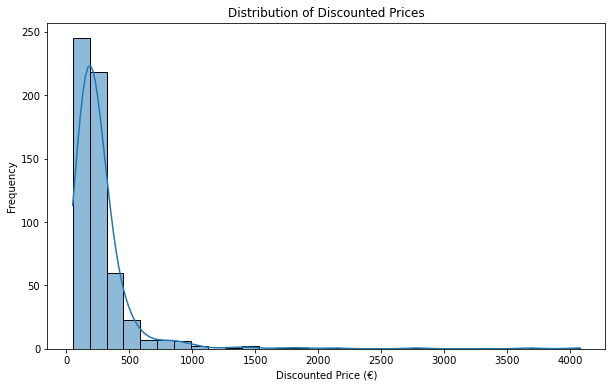

In [33]:
#This report helps visualize the spread of prices and identify any price clusters or outliers, which is crucial for pricing strategies and market positioning.
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of discounted prices
plt.figure(figsize=(10, 6))
sns.histplot(Adf['Discounted_Price_(€)'], bins=30, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price (€)')
plt.ylabel('Frequency')
plt.show()

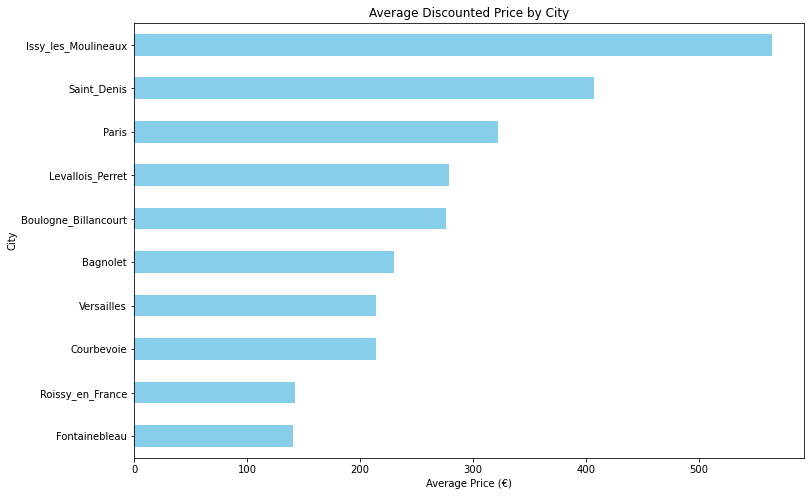

In [34]:
# which cities have higher or lower average prices, which can influence strategic decisions regarding location-based promotions or investments.

# Calculating average price by city
avg_price_by_city = Adf.groupby('City')['Discounted_Price_(€)'].mean().sort_values()

# Plotting the average price by city
plt.figure(figsize=(12, 8))
avg_price_by_city.plot(kind='barh', color='skyblue')
plt.title('Average Discounted Price by City')
plt.xlabel('Average Price (€)')
plt.ylabel('City')
plt.show()


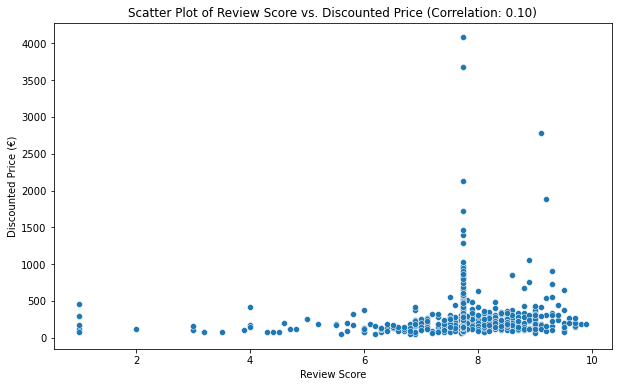

In [35]:
#Investigating the correlation between review scores and prices can help determine if higher prices are associated with higher review scores, indicating better value or luxury.

# Calculating the correlation between review score and discounted price
correlation = Adf[['Review_Score', 'Discounted_Price_(€)']].corr().iloc[0, 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Adf, x='Review_Score', y='Discounted_Price_(€)')
plt.title(f'Scatter Plot of Review Score vs. Discounted Price (Correlation: {correlation:.2f})')
plt.xlabel('Review Score')
plt.ylabel('Discounted Price (€)')
plt.show()


In [36]:
# Understanding how availability statuses are distributed can provide insights into inventory management and availability patterns.

print(Adf['Availability_Info'].unique())

['Plus que 1 hébergement à ce prix sur notre site' 'No_Availability'
 'Plus que 2 hébergements à ce prix sur notre site'
 'Plus que 5 hébergements à ce prix sur notre site'
 'Plus que 4 hébergements à ce prix sur notre site'
 'Plus que 7 hébergements à ce prix sur notre site'
 'Plus que 3 hébergements à ce prix sur notre site'
 'Plus que 1 à ce prix sur notre site'
 'Plus que 2 à ce prix sur notre site'
 'Plus que 3 à ce prix sur notre site'
 'Plus que 7 à ce prix sur notre site'
 'Plus que 6 hébergements à ce prix sur notre site'
 'Plus que 6 à ce prix sur notre site']


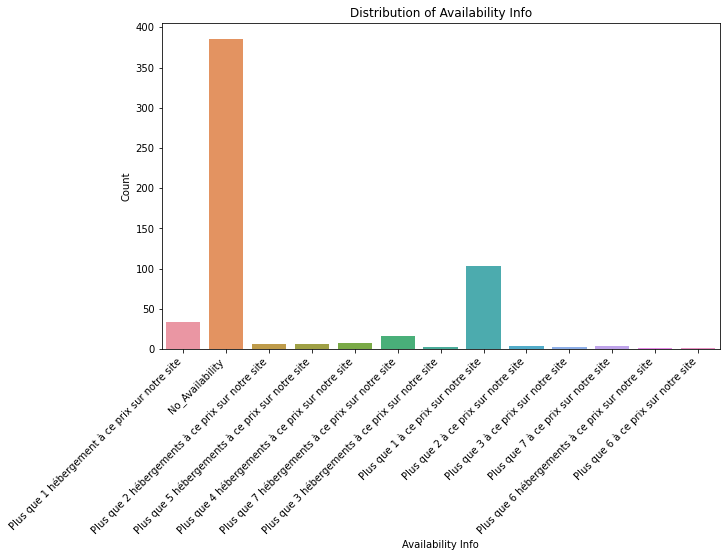

In [37]:
# Plotting the count of availability info
plt.figure(figsize=(10, 6))
sns.countplot(data=Adf, x='Availability_Info')
plt.title('Distribution of Availability Info')
plt.xlabel('Availability Info')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
#checking for the count of no_availability, we see that it's very higther in our data.
Adf['Availability_Info'].value_counts()

No_Availability                                     386
Plus que 1 à ce prix sur notre site                 104
Plus que 1 hébergement à ce prix sur notre site      34
Plus que 7 hébergements à ce prix sur notre site     16
Plus que 4 hébergements à ce prix sur notre site      8
Plus que 2 hébergements à ce prix sur notre site      7
Plus que 5 hébergements à ce prix sur notre site      6
Plus que 2 à ce prix sur notre site                   4
Plus que 7 à ce prix sur notre site                   4
Plus que 3 hébergements à ce prix sur notre site      3
Plus que 3 à ce prix sur notre site                   3
Plus que 6 hébergements à ce prix sur notre site      1
Plus que 6 à ce prix sur notre site                   1
Name: Availability_Info, dtype: int64

#  3) Machine learning - price prediction model


In [39]:
df.columns

Index(['City', 'Distance_from_Center_(km)', 'Review_Score',
       'Number_of_Experiences', 'Availability_Info', 'Discounted_Price_(€)',
       'Review_Text_Exceptionnel', 'Review_Text_Fabuleux',
       'Review_Text_No-review', 'Review_Text_Superbe',
       ...
       'Bed_Type_Studio entier • 1 salle de bains • 40m²',
       'Bed_Type_Studio entier • 1 cuisine • 20m²',
       'Bed_Type_Studio entier • 1 cuisine • 27m²',
       'Bed_Type_Studio entier • 1 cuisine • 29m²',
       'Bed_Type_Studio entier • 1 cuisine • 34m²',
       'Bed_Type_Suite privée • 1 chambre • 1 salon • 1 salle de bains • 40m²',
       'Bed_Type_Types de lits : 1 lit double ou 2 lits simples',
       'Bed_Type_Villa entière • 1 chambre • 6 salles de bains • 1 cuisine • 320m²',
       'Bed_Type_Villa entière • 2 chambres • 1 salle de bains • 1 cuisine • 120m²',
       'Bed_Type_Villa entière • 6 chambres • 1 salle de bains • 1 cuisine • 300m²'],
      dtype='object', length=295)

In [40]:
# Import necessary libraries for machine learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
X = df.drop("Discounted_Price_(€)", axis=1)  # Drop the target variable from features
y = df["Discounted_Price_(€)"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the test set
y_pred_linear = linear_model.predict(X_test)

# Method 2: Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance for both models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}")
    print()

# Evaluate Linear Regression Model
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Evaluate Random Forest Model
evaluate_model(y_test, y_pred_rf, "Random Forest")


Model: Linear Regression
Mean Absolute Error: 9424119518.77
Mean Squared Error: 2583349756827552710656.00
R^2 Score: -74058938551091888.00

Model: Random Forest
Mean Absolute Error: 95.11
Mean Squared Error: 25257.67
R^2 Score: 0.28



In [42]:
# Sauvegarder le modèle Random Forest
import joblib
joblib.dump(rf_model, 'Price_prediction_model.pkl')

['Price_prediction_model.pkl']